# Notebook associated with the manuscript on FAIR-BioRS

## Import required packages

In [1]:
from github import Github
import pandas as pd
import time
import os
import math
from IPython.display import clear_output
import re
import collections
import textwrap
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
color_6 = '#fb5607'
color_5 = '#ef476f'
color_2 = '#ffd166'
color_3 = '#06d6a0'
color_4 = '#118ab2'
#color_1 = '#073b4c'
color_1 = '#2563EB'
color_palette = [color_1, color_2, color_3, color_4, color_5, color_6]

import seaborn as sns
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

## General functions

In [2]:
def create_folder_if_not_exist(folder_path):
    if not os.path.isdir(folder_path):
        os.mkdir(folder_path)
    return(folder_path)
        
def save_image_png(fig, folder_path, plot_name, output_format):
    folder_path = create_folder_if_not_exist(folder_path)
    file_name = plot_name + "." + output_format
    file_path = os.path.join(folder_path, file_name)
    fig.savefig(file_path, bbox_inches='tight')

def frenquency_suggestions(df_sub):
    #Frequency of suggestions
    list_suggestions = list (df_sub.values)
    list_suggestions_cleaned = []
    for item in list_suggestions:
        item = item.split(";")
        list_suggestions_cleaned.extend(item) 
    list_suggestions_cleaned = [x.strip() for x in list_suggestions_cleaned]
    frequency_all = dict(collections.Counter(list_suggestions_cleaned))
    frequency = dict( sorted(frequency_all.items(),
                               key=lambda item: item[1],
                               reverse=True))
    return(frequency)
current_folder = os.getcwd()

## Number of biomedical related repositories on GitHub

In [3]:
GITHUB_ACCESS_TOKEN = os.getenv('GITHUB_ACCESS_TOKEN')
g = Github(GITHUB_ACCESS_TOKEN)
print('Success: GitHub Access Token loaded')

Success: GitHub Access Token loaded


In [9]:
#get number of repositories on GitHub with "biomedical" included in the name, readme, or description created in a given month of a year
#since the GitHub API has a result rate limit of 1000, we search month by month assuming no single month has more than 1000 results
#we then combined monthly results to get year-wise number of repositories created with keyword biomedical
#results are saved in a dataframe and csv file for further analysis
#this code block can be skipped since the csv file with results is included with the code
def search_github_repo_created_month(keywords, created_month):
    created_month_query  = ' created:' + created_month
    query = keywords + ' in:name'+ ' in:readme' + ' in:description' + created_month_query
    result = g.search_repositories(query)
    return result

keywords = 'biomedical'
start_year = 2010
end_year = 2021
year_list = [str(x) for x in range(start_year, end_year+1)]
month_list = ["%.2d" % x for x in range(1,13)]
df = pd.DataFrame(columns = ['year', 'month', 'count'])
search_count = 0
search_limit = 30
# for year in year_list:
#     for month in month_list:
#         created_month = year + '-' + month
#         result = search_github_repo_created_month(keywords, created_month)
#         df.loc[len(df.index)] = [year, month, result.totalCount] 
#         search_count += 1
#         if search_count == search_limit:
#             time.sleep(65)
#             search_count = 0
print("Success: Month-wise number of repositories created on GitHub between " + str(start_year) + " and " + str(end_year) + " with keyword biomedical pulled and saved in a dataframe")

#get year wise results
#df_yearwise = pd.DataFrame(columns = ['year', 'count'])
# for year in year_list:
#     df_sub = df[df['year'] == year]
#     total = df_sub['count'].sum()
#     df_yearwise.loc[len(df_yearwise.index)] = [year, total] 
df_yearwise.to_csv('github_biomedical_repo_count_yearwise.csv')
print("Success: Year-wise number of repositories created on GitHub between " + str(start_year) + " and " + str(end_year) + " with keyword biomedical calculated saved in a dataframe and in a csv file")
print(df_yearwise)

Success: Month-wise number of repositories created on GitHub between 2010 and 2021 with keyword biomedical pulled and saved in a dataframe


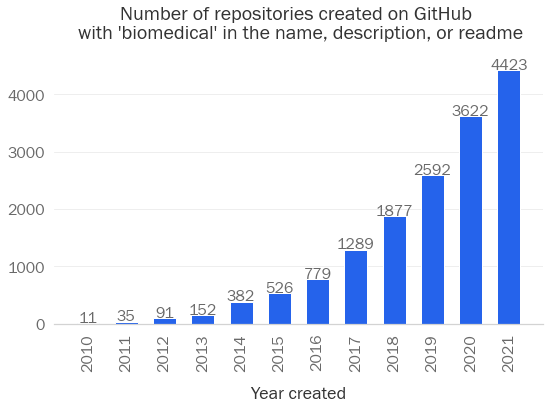

In [119]:
# visualize results
github_input_file = os.path.join('input','github_biomedical_repo_count_yearwise.csv')
df = pd.read_csv(github_input_file)
fig, ax = plt.subplots(figsize=(8,6))
width = 0.6
ind = 0
x = df['year']
y = df["count"]
bars = ax.bar(x, y, width, color=color_palette[ind])
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x()
    w = bar.get_width()
    ax.text(xval + w/2, yval+20, round(yval,1), horizontalalignment='center',)
ax.set_xticks(df['year'])
ax.grid(axis='y', color = '#EEEEEE')
ax.set_axisbelow(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Year created', labelpad=15, color='#333333')
plt.title("Number of repositories created on GitHub \n with 'biomedical' in the name, description, or readme", color='#333333', fontsize = 20, y = 1.05)
plt.xticks(rotation=90, ha = 'center')
fig.tight_layout()
plot_name = 'github-biomedical-repo-count-yearwise'
save_image_png(fig, 'output', plot_name, 'png')

## Review analysis

In [139]:
# Load review data
# This section requires the data.xlsx file available in the docs folder at https://github.com/fairdataihub/FAIR-BioRS-data and at [ZENODO LINK]
# This assumes that the FAIR-BioRS-data folder is at the same location as the FAIR-BioRS-code folder
main_folder = os.path.dirname(os.getcwd())
data_folder = os.path.join(main_folder, 'FAIR-BioRS-data', 'docs')
data_file_name = 'data.xlsx'
data_file_location = os.path.join(data_folder, data_file_name)
df = pd.read_excel(data_file_location,
              sheet_name='literatureReviewKeywords')  

### Standards

In [121]:
#Number of studies
df_sub = df[['doiOrLink', 'standardsSuggestion']].iloc[2:].dropna()
total_studies = len(df_sub)
print("From the reviewed studies, " + str(total_studies) + " made a suggestion about the standards to follow when developing a research software")
if total_studies>0:
    display(df_sub)

From the reviewed studies, 0 made a suggestion about the standards to follow when developing a research software


In [122]:
df_sub = df[['doiOrLink', 'standardsHelp']].iloc[2:].dropna()
total_studies = len(df_sub)
print("From the reviewed studies, " + str(total_studies) + " made a suggestion about resources to help with standards")
#if total_studies>0:
#    display(df_sub)

From the reviewed studies, 1 made a suggestion about resources to help with standards


### Best practices

In [123]:
#Number of studies
df_sub = df[['doiOrLink', 'title', 'bestPracticeSuggestion']].iloc[2:].dropna()
total_studies = len(df_sub)
print("From the reviewed studies, " + str(total_studies) + " made a suggestion about the best practices to follow when developing a research software")
#if total_studies>0:
#    display(df_sub)

From the reviewed studies, 15 made a suggestion about the best practices to follow when developing a research software


In [124]:
#Frequency of suggestions
list_suggestions = df_sub['bestPracticeSuggestion']
list_suggestions_cleaned = []
for item in list_suggestions:
    item = item.split(";")
    item = [re.sub("[\(\[].*?[\)\]]", "", x) for x in item]
    item = [x.strip() for x in item]
    list_suggestions_cleaned.extend(item) 
list_suggestions_unique = list(set(list_suggestions_cleaned))
frequency = {}
for item in list_suggestions_unique:
    #print('---------------')
    #print(item)
    df_sub2 = df_sub[df_sub['bestPracticeSuggestion'].str.contains(item)]
    #display(df_sub2)
    frequency[item] = len(df_sub2)
frequency = dict( sorted(frequency.items(),
                               key=lambda item: item[1],
                               reverse=True))
print(frequency)

{'Develop with a version control system': 12, 'Use container technologies': 6, 'Have code level documentation': 5, 'Provide tests': 3, 'Record dependencies': 2, 'Make code modular': 2, 'Include sample data': 1}


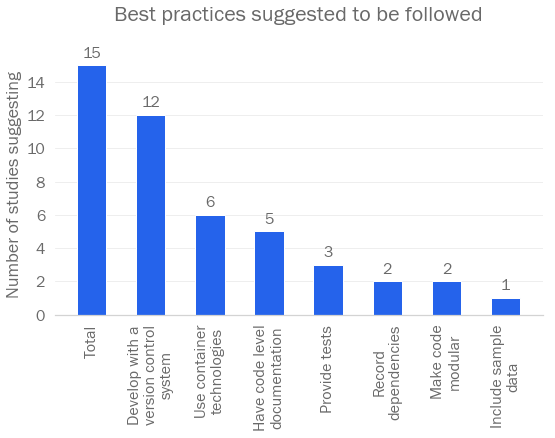

In [125]:
# Visualize
fig, ax = plt.subplots(figsize=(8,6.5))
width = 0.5
x = list(frequency.keys())
y = list(frequency.values())

# total
bars = ax.bar("Total", total_studies, width, color=color_palette[0])
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x()
    w = bar.get_width()
    ax.text(xval + w/2, yval+0.5, round(yval,1), horizontalalignment='center',)
bars = (ax.bar(x, y, width, color=color_palette[0]))
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x()
    w = bar.get_width()
    ax.text(xval + w/2, yval+0.5, round(yval,1), horizontalalignment='center',)
labels = ["Total"] + x
max_width = 16
ax.set_xticklabels(textwrap.fill(x, max_width) for x in labels)
ax.set_yticks(range(0, total_studies+1, 2))
ax.grid(axis='y', color = '#EEEEEE')
ax.set_axisbelow(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.spines['left'].set_visible(False)
plt.ylabel('Number of studies suggesting', fontsize=18)
plt.title("Best practices suggested to be followed", fontsize = 22, y = 1.1)
plt.xticks(rotation = 90, ha = 'center')
fig.tight_layout()
plot_name = 'best-practices-suggested'
save_image_png(fig, 'output', plot_name, 'svg')

In [126]:
#Number of studies
df_sub = df[['doiOrLink', 'title', 'bestPracticeHelp']].iloc[2:].dropna()
total_studies = len(df_sub)
print("From the reviewed studies, " + str(total_studies) + " made a suggestion about resources to help with best practices")
#if total_studies>0:
#    display(df_sub)

From the reviewed studies, 3 made a suggestion about resources to help with best practices


### Best practices for documentation

In [127]:
df_sub = df[['doiOrLink', 'title', 'documentationSuggestion']].iloc[2:].dropna()
total_studies = len(df_sub)
print("From the reviewed studies, " + str(total_studies) + " made a suggestion about documenting a research software")
#if total_studies>0:
#    display(df_sub)

From the reviewed studies, 6 made a suggestion about documenting a research software


In [128]:
df_sub = df[['doiOrLink', 'title', 'documentationHelp']].iloc[2:].dropna()
total_studies = len(df_sub)
print("From the reviewed studies, " + str(total_studies) + " made a suggestion about resources to help with documenting a research software")
#if total_studies>0:
#    display(df_sub)

From the reviewed studies, 6 made a suggestion about resources to help with documenting a research software


### Files suggested to be shared

In [129]:
#Number of studies
df_sub = df[['doiOrLink', 'title', 'dataFileSuggestion']].iloc[2:].dropna()
total_studies = len(df_sub)
print("From the reviewed studies, " + str(total_studies) + " made a suggestion about the files to be shared for a research software")
#display(df_sub)

From the reviewed studies, 6 made a suggestion about the files to be shared for a research software


In [130]:
#Frequency of suggestions
frequency = frenquency_suggestions(df_sub['dataFileSuggestion'])
print(frequency)

{'Source code': 6, 'Executable': 2, 'Input data': 1, 'Result data': 1}


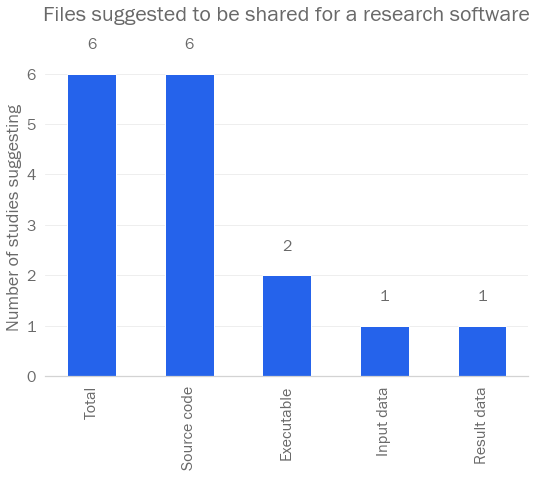

In [131]:
# Visualize
fig, ax = plt.subplots(figsize=(8,7))
width = 0.5
x = list(frequency.keys())
y = list(frequency.values())

# total
bars = ax.bar("Total", total_studies, width, color=color_palette[0])
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x()
    w = bar.get_width()
    ax.text(xval + w/2, yval+0.5, round(yval,1), horizontalalignment='center',)
bars = (ax.bar(x, y, width, color=color_palette[0]))
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x()
    w = bar.get_width()
    ax.text(xval + w/2, yval+0.5, round(yval,1), horizontalalignment='center',)
ax.set_xticks(["Total"] + x)
ax.set_yticks(range(0, total_studies+1))
ax.grid(axis='y', color = '#EEEEEE')
ax.set_axisbelow(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.spines['left'].set_visible(False)
plt.ylabel('Number of studies suggesting', fontsize=18)
plt.title("Files suggested to be shared for a research software", fontsize = 22, y = 1.1)
plt.xticks(rotation = 90, ha = 'center')
fig.tight_layout()
plot_name = 'files-suggested'
save_image_png(fig, 'output', plot_name, 'svg')

### Metadata files suggested to be included

In [140]:
#Number of studies
df_sub = df[['doiOrLink', 'title', 'metadataFilesSuggestion']].iloc[2:].dropna()
total_studies = len(df_sub)
print("From the reviewed studies, " + str(total_studies) + " made a suggestion about the metadata files and ontologies to be used for a research software")
#display(df_sub)

From the reviewed studies, 16 made a suggestion about the metadata files and ontologies to be used for a research software


In [141]:
#Frequency of suggestions
frequency = frenquency_suggestions(df_sub['metadataFilesSuggestion'])
print(frequency)

{'CodeMeta': 12, 'Citation File Format': 6, 'EDAM': 3, 'Bioschemas': 2, 'A CITATION file': 2, 'biotoolsSchema': 1, 'R packages DESCRIPTION file': 1, 'PEP 566 Metadata for Python Packages': 1, 'Software Ontology': 1, 'PROV-O': 1, 'RDA Research Schemas': 1}


In [142]:
#for item in frequency.keys():
#    print('-----------')
#    print(item)
#    df_sub3 = df_sub[df_sub['metadataFilesSuggestion'].str.contains(item)]
#    display(df_sub3)

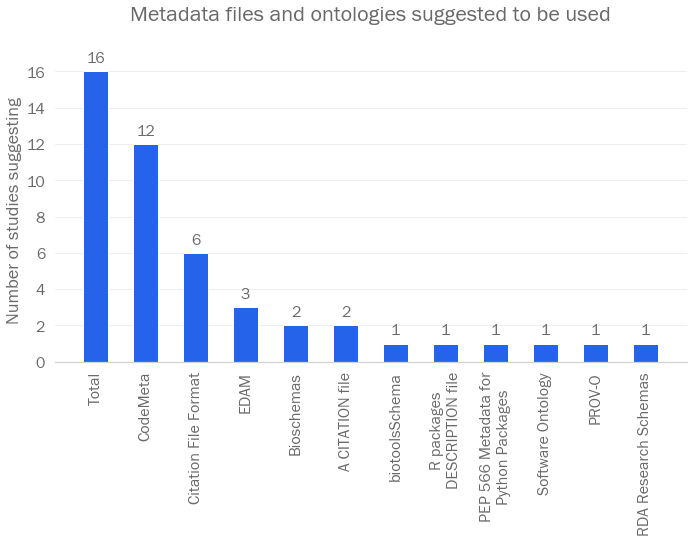

In [145]:
# Visualize
fig, ax = plt.subplots(figsize=(10,8))
width = 0.5
x = list(frequency.keys())
y = list(frequency.values())

# total
bars = ax.bar("Total", total_studies, width, color=color_palette[0])
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x()
    w = bar.get_width()
    ax.text(xval + w/2, yval+0.5, round(yval,1), horizontalalignment='center',)
bars = (ax.bar(x, y, width, color=color_palette[ind]))
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x()
    w = bar.get_width()
    ax.text(xval + w/2, yval+0.5, round(yval,1), horizontalalignment='center',)
labels = ["Total"] + x
max_width = 20
ax.set_xticklabels(textwrap.fill(x, max_width) for x in labels)
ax.set_yticks(range(0, total_studies+1, 2))
ax.grid(axis='y', color = '#EEEEEE')
ax.set_axisbelow(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.spines['left'].set_visible(False)
plt.ylabel('Number of studies suggesting', fontsize=18)
plt.title("Metadata files and ontologies suggested to be used", fontsize = 22, y = 1.1)
plt.xticks(rotation=90, ha = 'center')
fig.tight_layout()
plot_name = 'metadata-files-suggested'
save_image_png(fig, 'output', plot_name, 'svg')

### License suggested to be used

In [146]:
#Number of studies
df_sub = df[['doiOrLink', 'title', 'licenseSuggestion']].iloc[2:].dropna()
total_studies = len(df_sub)
print("From the reviewed studies, " + str(total_studies) + " made a suggestion about the licenses to be used for sharing a research software")
#display(df_sub)

From the reviewed studies, 14 made a suggestion about the licenses to be used for sharing a research software


In [147]:
#Frequency of suggestions
frequency = frenquency_suggestions(df_sub['licenseSuggestion'])
print(frequency)

{'Open source licenses': 8, 'OSI-approved licenses': 3, 'Apache 2.0': 3, 'MIT': 3, 'Permissive licenses': 2, 'Licenses from the SPDX referential catalog': 1, 'FSF-approved licenses': 1, 'BSD': 1}


In [148]:
#for item in frequency.keys():
#    print('-----------')
#    print(item)
#    df_sub3 = df_sub[df_sub['licenseSuggestion'].str.contains(item)]
#    display(df_sub3)

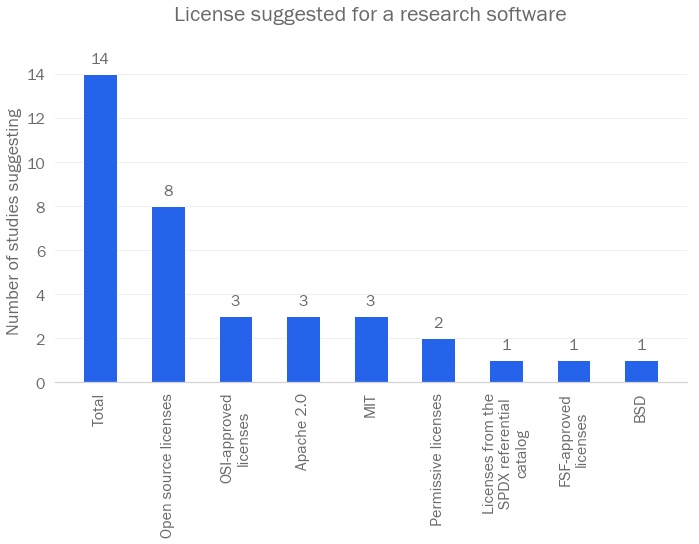

In [150]:
# Visualize
fig, ax = plt.subplots(figsize=(10,8))
width = 0.5
ind = 0
x = list(frequency.keys())
y = list(frequency.values())

# total
bars = ax.bar("Total", total_studies, width, color=color_palette[0])
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x()
    w = bar.get_width()
    ax.text(xval + w/2, yval+0.5, round(yval,1), horizontalalignment='center',)
bars = (ax.bar(x, y, width, color=color_palette[ind]))
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x()
    w = bar.get_width()
    ax.text(xval + w/2, yval+0.5, round(yval,1), horizontalalignment='center',)
labels = ["Total"] + x
max_width = 20
ax.set_xticklabels(textwrap.fill(x, max_width) for x in labels)
ax.set_yticks(range(0, total_studies+1, 2))
ax.grid(axis='y', color = '#EEEEEE')
ax.set_axisbelow(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.spines['left'].set_visible(False)
plt.ylabel('Number of studies suggesting', fontsize=18)
plt.title("License suggested for a research software", fontsize = 22, y = 1.1)
plt.xticks(rotation=90, ha = 'center')
fig.tight_layout()
plot_name = 'license-suggested'
save_image_png(fig, 'output', plot_name, 'svg')

In [151]:
#Number of studies
df_sub = df[['doiOrLink', 'title', 'licenseHelp']].iloc[2:].dropna()
total_studies = len(df_sub)
print("From the reviewed studies, " + str(total_studies) + " made a suggestion about resources to help wtith selecting a license for research software")
#display(df_sub)

From the reviewed studies, 14 made a suggestion about resources to help wtith selecting a license for research software


### Repositories suggested to be used

In [157]:
#Number of studies
df_sub = df[['doiOrLink', 'title', 'repositorySuggestion']].iloc[2:].dropna()
total_studies = len(df_sub)
print("From the reviewed studies, " + str(total_studies) + " made a suggestion about a repository to use for sharing research software")
#display(df_sub)

From the reviewed studies, 18 made a suggestion about a repository to use for sharing research software


In [158]:
#Frequency of suggestions
frequency = frenquency_suggestions(df_sub['repositorySuggestion'])
print(frequency)

{'Zenodo': 17, 'Figshare': 10, 'Software Heritage': 9, 'CRAN': 5, 'PyPI': 3, 'HAL': 3, 'Conda': 2, 'Bioconductor': 2, 'ModelDB': 1, 'Mendeley Data': 1, 'Dockstore': 1, 'NanoHub': 1, 'Dataverse': 1}


In [159]:
#for item in frequency.keys():
#    print('-----------')
#    print(item)
#    df_sub3 = df_sub[df_sub['repositorySuggestion'].str.contains(item)]
#    display(df_sub3)

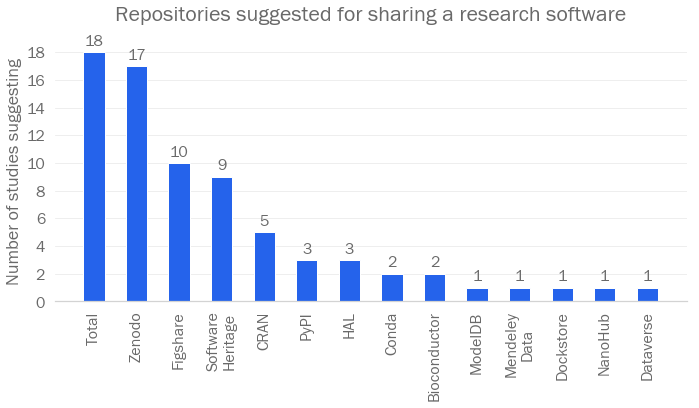

In [166]:
# Visualize
fig, ax = plt.subplots(figsize=(10,6))
width = 0.5
x = list(frequency.keys())
y = list(frequency.values())

# total
bars = ax.bar("Total", total_studies, width, color=color_palette[0])
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x()
    w = bar.get_width()
    ax.text(xval + w/2, yval+0.5, round(yval,1), horizontalalignment='center',)
bars = (ax.bar(x, y, width, color=color_palette[0]))
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x()
    w = bar.get_width()
    ax.text(xval + w/2, yval+0.5, round(yval,1), horizontalalignment='center',)
labels = ["Total"] + x
max_width = 12
ax.set_xticklabels(textwrap.fill(x, max_width) for x in labels)
ax.set_yticks(range(0, total_studies+1, 2))
ax.grid(axis='y', color = '#EEEEEE')
ax.set_axisbelow(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.spines['left'].set_visible(False)
plt.ylabel('Number of studies suggesting', fontsize=18)
plt.title("Repositories suggested for sharing a research software", fontsize = 22, y = 1.05)
plt.xticks(rotation=90, ha = 'center')
fig.tight_layout()
plot_name = 'repositories-suggested'
save_image_png(fig, 'output', plot_name, 'svg')

### Registeries suggested to be used

In [167]:
#Number of studies
df_sub = df[['doiOrLink', 'title', 'registerySuggestion']].iloc[2:].dropna()
total_studies = len(df_sub)
print("From the reviewed studies, " + str(total_studies) + " made a suggestion about the registeries to use for a research software")
display(df_sub)

From the reviewed studies, 5 made a suggestion about the registeries to use for a research software


,doiOrLink,title,registerySuggestion
4,https://doi.org/10.3233/DS-190026,Towards FAIR principles for research software,Zenodo; Software Heritage; CRAN; PyPI; Figshare; BioConductor; bio.tools; Conda; BioContainers
5,https://doi.org/10.5281/zenodo.4095092,M2.15 Assessment report on 'FAIRness of software,Zenodo; HAL; Software Heritage; CRAN; PyPI
9,https://arxiv.org/abs/2101.10883v4,A Fresh Look at FAIR for Research Software,Zenodo
11,https://doi.org/10.12688/f1000research.11407.1,Four simple recommendations to encourage best practices in research software,bio.tools; biojs.io; Omic Tools; DataCite; BioCatalogue
18,https://doi.org/10.5281/zenodo.2555498,Top 10 FAIR Data & Software Things - Research Software,bio.tools; Research Software Directory; rOpenSci Project; Zenodo


In [168]:
#Frequency of suggestions
frequency = frenquency_suggestions(df_sub['registerySuggestion'])
print(frequency)

{'Zenodo': 4, 'bio.tools': 3, 'Software Heritage': 2, 'CRAN': 2, 'PyPI': 2, 'Figshare': 1, 'BioConductor': 1, 'Conda': 1, 'BioContainers': 1, 'HAL': 1, 'biojs.io': 1, 'Omic Tools': 1, 'DataCite': 1, 'BioCatalogue': 1, 'Research Software Directory': 1, 'rOpenSci Project': 1}


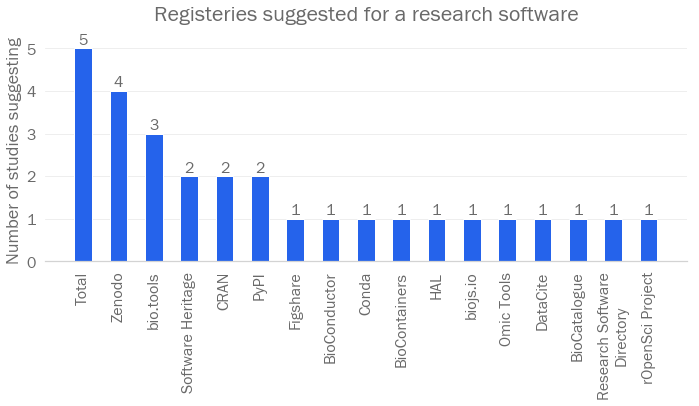

In [176]:
# Visualize
fig, ax = plt.subplots(figsize=(10,6))
width = 0.5
x = list(frequency.keys())
y = list(frequency.values())

# total
bars = ax.bar("Total", total_studies, width, color=color_palette[0])
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x()
    w = bar.get_width()
    ax.text(xval + w/2, yval+0.1, round(yval,1), horizontalalignment='center',)
bars = (ax.bar(x, y, width, color=color_palette[0]))
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x()
    w = bar.get_width()
    ax.text(xval + w/2, yval+0.1, round(yval,1), horizontalalignment='center',)
labels = ["Total"] + x
max_width = 18
ax.set_xticklabels(textwrap.fill(x, max_width) for x in labels)
ax.set_yticks(range(0, total_studies+1, 1))
ax.grid(axis='y', color = '#EEEEEE')
ax.set_axisbelow(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.spines['left'].set_visible(False)
plt.ylabel('Number of studies suggesting', fontsize=18)
plt.title("Registeries suggested for a research software", fontsize = 22, y = 1.05)
plt.xticks(rotation=90, ha = 'center')
fig.tight_layout()
plot_name = 'registeries-suggested'
save_image_png(fig, 'output', plot_name, 'svg')